In [1]:
import pandas as pd
from sklearn .preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
from math import sqrt
from numpy import split
from numpy import array
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [3]:
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
pd.options.display.float_format = '{:,.10f}'.format

In [4]:
data  = pd.read_excel('emotion.xls').drop('Date', axis=1 ).set_index("day")

In [5]:
data = data.astype('float32')

In [6]:
data_vol =  data.iloc[ : , 0:13].drop(['Close_nifty', 'Close_sensex','% change_nifty', '% change_sensex'], axis= 1)

In [7]:
data_vol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3168 entries, 2007-04-19 to 2020-03-16
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Anger                   3168 non-null   float32
 1   Anticipation            3168 non-null   float32
 2   Disgust                 3168 non-null   float32
 3   Fear                    3168 non-null   float32
 4   Joy                     3168 non-null   float32
 5   Sadness                 3168 non-null   float32
 6   Surprise                3168 non-null   float32
 7   Trust                   3168 non-null   float32
 8   Conditional Volatility  3168 non-null   float32
dtypes: float32(9)
memory usage: 136.1 KB


In [8]:
data_vol.head()

,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,Conditional Volatility
day,,,,,,,,,
2007-04-19,0.5000000000,2.2100000381,0.0000000000,1.5160000324,0.8130000234,0.4309999943,0.0000000000,1.0470000505,1.9240180254
2007-04-23,0.4850000143,1.3819999695,0.0000000000,0.5780000091,1.0479999781,2.6700000763,0.0000000000,1.1720000505,1.9290779829
2007-04-30,0.0000000000,2.7019999027,0.0000000000,0.2969999909,1.6189999580,0.0000000000,0.0000000000,1.6410000324,2.1650118828
2007-05-07,0.5310000181,3.1619999409,0.0000000000,0.2969999909,2.6429998875,0.2029999942,0.3670000136,3.5710000992,2.0097639561
2007-05-08,0.0000000000,1.0069999695,0.0000000000,0.0000000000,0.8930000067,0.0000000000,0.0000000000,1.0470000505,1.8497519493


## Train the Model

In [121]:
# def split_dataset(data):
# 	# split into  months
#     train, test = data[0:3138], data[3138:3168]
# 	# restructure into windows of monthly data
#     train = array(split(train, len(train)/30))
#     test = array(split(test, len(test)/30))
#     return train, test

In [17]:
yscaler = MinMaxScaler()
df = pd.DataFrame(data_vol.iloc[18:3138, 8])
df = pd.DataFrame(yscaler.fit_transform(df), columns=df.columns, index=df.index)

In [19]:
df.describe()

,Conditional Volatility
count,"3,120.0000000000"
mean,0.0627599508
std,0.1095687598
min,0.0000000000
25%,0.0140771582
50%,0.0270586554
75%,0.0569391027
max,1.0000000000


In [20]:
scaler = MinMaxScaler()
train, test = data_vol[18:3138], data_vol[3138:3168]
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)

In [21]:
train.describe()

,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,Conditional Volatility
count,"3,120.0000000000","3,120.0000000000","3,120.0000000000","3,120.0000000000","3,120.0000000000","3,120.0000000000","3,120.0000000000","3,120.0000000000","3,120.0000000000"
mean,0.0667189583,0.1310477257,0.0656884834,0.0793018043,0.1180894151,0.1094094813,0.0957049057,0.0974604413,0.0627599508
std,0.1343169659,0.1967794001,0.1465145200,0.1510540098,0.1811063737,0.1672122926,0.1806580275,0.1728436798,0.1095687598
min,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,0.0102568883,0.0386259221,0.0000000000,0.0146211691,0.0332342461,0.0263262000,0.0130911404,0.0220476161,0.0140771582
50%,0.0205137767,0.0591193344,0.0147001697,0.0273765000,0.0526462533,0.0504153557,0.0318445377,0.0353673287,0.0270586554
75%,0.0390222305,0.1055044997,0.0361902015,0.0472020544,0.0934748799,0.0913505517,0.0642666277,0.0630328879,0.0569391027
max,0.9999999404,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000


In [22]:
train = array(split(train.values, len(train)/30))

In [23]:
test = array(split(test.values, len(test)/30))

In [13]:
# scaler = MinMaxScaler()
# for col in data_vol.columns :
# # for i in range (0,train.shape[2]) :
#     data_vol[[col]] = scaler.fit_transform(data_vol[[col]])
# #     train[:,:, i] = scaler.fit_transform(train[:,:,i])

In [14]:
def to_supervised(train, n_input, n_out=30):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	for _ in range(len(data)):
		in_end = in_start + n_input
		out_end = in_end + n_out
		if out_end <= len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 8])
		in_start += 1
	return array(X), array(y)

In [16]:
def build_model(train, n_input):
	train_x, train_y = to_supervised(train, n_input)
	verbose, epochs, batch_size = 1, 55, 20
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	model.summary()
    
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

In [17]:
n_input = 30 
model = build_model(train, n_input) 
model.save( 'model6' + '.h5')
print("model saved")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               168000    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 30, 200)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 200)           320800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 30, 100)           20100     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 1)             101       
Total params: 509,001
Trainable params: 509,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/55
3061/3061 [==============================] - 52s 17ms/step - loss: 0.0061
Epoch 2/55
3061/3061 [=======

### Prediction and Evaluation

In [24]:
from numpy import loadtxt
from keras.models import load_model  
from keras.utils.vis_utils import plot_model

In [25]:
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, :]
	# reshape into [1, n_input, n]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	# forecast the next week
	yhat = model.predict(input_x, verbose=1)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

In [49]:
def evaluate_forecasts_new(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
        
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

In [31]:
def evaluate_model_new(train, test, n_input):
    
	# history is a list of weekly data
	history = [x for x in train]
    
	# walk-forward validation 
	predictions = list()
    
	for i in range(len(test)):
		yhat_sequence = forecast(model, history, n_input)
# 		print(type(yhat_sequence))
# 		print(yhat_sequence.shape) 
# 		y1 = scaler.inverse_transform(yhat_sequence)
# 		print(type(y1))
# 		print(y1.shape)    
		predictions.append(yhat_sequence)
		history.append(test[i, :])
        
	# evaluate predictions days for each week
	predictions = array(predictions)
# 	print(predictions.shape)  
# 	predictions = scaler.inverse_transform(predictions[0,:,:])
	return predictions

In [32]:
preds = evaluate_model_new(train, test, 30)

1/1 [==============================] - 0s 18ms/step


In [37]:
preds.shape
predictions = yscaler.inverse_transform(preds[0,:, :])

In [58]:
predictions = predictions.reshape(1,-1,1)
print(predictions.shape)

(1, 30, 1)


In [59]:
score, scores = evaluate_forecasts_new(test[:, :, 8], predictions)

In [40]:
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

In [60]:
summarize_scores('test', score, scores)

test: [2.334] 0.7, 0.4, 0.4, 0.1, 0.2, 0.3, 0.3, 0.4, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.3, 0.4, 0.4, 0.4, 0.7, 0.5, 0.5, 0.4, 0.2, 0.6, 2.8, 2.5, 8.2, 8.7


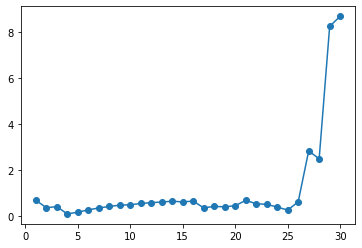

In [63]:
days = [i for i in range (1,31, 1)]
pyplot.plot(days, scores, marker='o', label='lstm rmse')
pyplot.show()

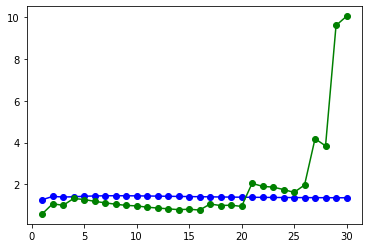

In [71]:
days = [i for i in range (1,31, 1)]
pyplot.plot( days, predictions[0,:, 0], color = 'blue',linestyle='-' ,  marker='o', label='predicted values')
pyplot.plot( days, test[0, :, 8], color = 'green', linestyle='-',  marker='o', label= 'actual values')
pyplot.show()

In [66]:
train.shape

(104, 30, 9)

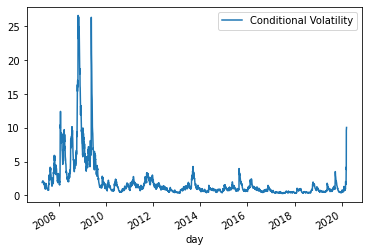

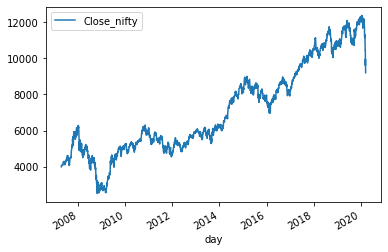

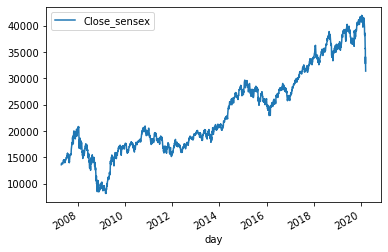

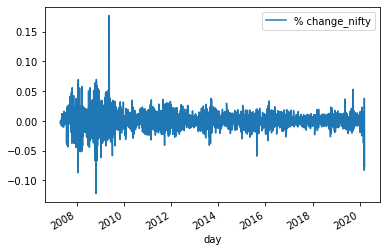

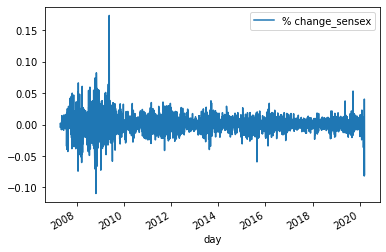

In [70]:
data_vol.plot(y='Conditional Volatility', use_index=True)
data.plot(y='Close_nifty', use_index=True)
data.plot(y='Close_sensex', use_index=True)
data.plot(y='% change_nifty', use_index=True)
data.plot(y='% change_sensex', use_index=True)

In [44]:
test[:,:,8]

array([[ 0.5828008,  1.067434 ,  0.9941536,  1.321825 ,  1.272688 ,
         1.184532 ,  1.112607 ,  1.046578 ,  0.9901003,  0.9670153,
         0.9044366,  0.8639677,  0.8271698,  0.7853872,  0.8083171,
         0.7664459,  1.05643  ,  0.9836895,  1.000869 ,  0.9418073,
         2.046621 ,  1.901354 ,  1.865867 ,  1.749912 ,  1.612766 ,
         1.967009 ,  4.183232 ,  3.838745 ,  9.601299 , 10.04322  ]],
      dtype=float32)

In [43]:
print(test)

[[[ 35.487     121.113      11.823      65.804      95.448
    43.302      24.72      332.051       0.5828008]
  [ 27.569      78.366       7.191      36.028      61.85
    32.044      11.961     144.066       1.067434 ]
  [ 60.127     145.614      23.976      98.473     103.695
    62.826      32.096     257.784       0.9941536]
  [ 60.559     155.768      22.649      85.864     108.504
    54.643      47.478     246.732       1.321825 ]
  [ 46.697     131.154      19.502      72.626      94.742
    54.515      32.785     240.344       1.272688 ]
  [ 49.045     120.212      18.231      83.721      91.971
    53.594      29.202     220.311       1.184532 ]
  [ 58.876     110.035      18.496      85.32       83.411
    56.152      29.54      187.62        1.112607 ]
  [ 45.485     140.619      12.259      65.563     118.089
    46.624      31.083     230.138       1.046578 ]
  [ 33.251      99.1        12.121      57.83       69.31
    40.299      23.898     164.393       0.9901003]
  [

In [27]:
model = load_model('model6.h5')

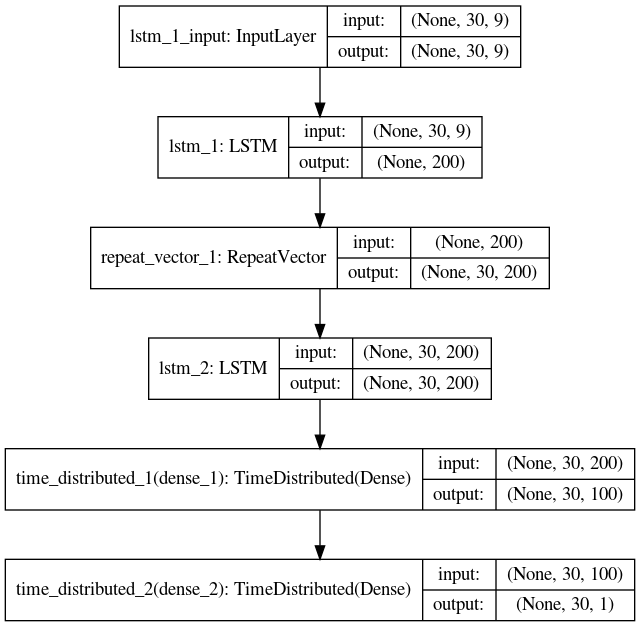

In [28]:
dot_img_file = 'model_5.png'
plot_model(model, to_file=dot_img_file, show_shapes=True, show_layer_names=True)

In [76]:
# invPred = scaler.inverse_transform(preds[0,:,0].reshape(-1, 1) )
print(scaler.inverse_transform(np.array(preds[:,:,0]).reshape(-1, 1)))

ValueError: non-broadcastable output operand with shape (30,1) doesn't match the broadcast shape (30,9)

In [79]:
summarize_scores('test', score, scores)

test: [0.012] 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0


If your time series is trending up or down, estimating these expected values may be difficult and normalization may not be the best method to use on your problem.

